In [1]:
import urllib3
from bs4 import BeautifulSoup
import pandas as pd
import random as r
import numpy as np
import matplotlib as plt

In [2]:
http = urllib3.PoolManager()
url = 'http://www.espn.com/mlb/team/stats/_/name/chc/season/2018/seasontype/2'
response = http.request('GET', url)

In [3]:
soup = BeautifulSoup(response.data, 'lxml')

In [4]:
table_element = soup.find_all('tr',{'class':'Table2__tr Table2__tr--sm Table2__even'})
player_stat_count = 0
player_list = []
stats_dictionary = {}
for element in table_element:
    player_name = element.find('a')
    
    if player_name is not None:
        player_name = player_name.contents[0]
        if player_name not in player_list:
            print(player_name)
            player_list.append(player_name)
    
    player_stats = element.find_all('span')
    
    if player_stats is not None:
        if len(player_stats) == 17:
            player_stat_count += 1
            if player_stat_count > len(player_list):
                continue
            stat_list = []
            for stat in player_stats:
                stat = stat.contents[0]
                stat_list.append(stat)
            stats_dictionary[player_stat_count] = stat_list

Javier Baez
Anthony Rizzo
Willson Contreras
Ben Zobrist
Albert Almora Jr.
Jason Heyward
Kyle Schwarber
Addison Russell
Kris Bryant
Ian Happ
David Bote
Victor Caratini
Tommy La Stella
Daniel Murphy
Kyle Hendricks
Jon Lester
Jose Quintana
Mike Montgomery
Chris Gimenez
Tyler Chatwood
Cole Hamels
Yu Darvish
Efren Navarro
Steve Cishek
Alec Mills
Mark Zagunis
Terrance Gore
Taylor Davis
Luke Farrell
James Norwood
Justin Hancock
Eddie Butler
Pedro Strop
Brian Duensing
Randy Rosario
Justin Wilson
Brandon Morrow
Duane Underwood Jr.
Brandon Kintzler
Mike Freeman


In [5]:
stat_names = ['games played', 'at bat', 'runs', 'hits', 'doubles', 
        'triples', 'home runs', 'runs batted in', 'total bases', 
        'walks', 'strikeouts', 'stolen bases', 'batting average', 
        'on base percentage', 'slugging percentage', 'OPS', 'WAR']
df_stats = pd.DataFrame(stats_dictionary)
df_stats.columns = player_list
df_stats = df_stats.transpose()
df_stats.columns = stat_names
df_stats.head(3)

,games played,at bat,runs,hits,doubles,triples,home runs,runs batted in,total bases,walks,strikeouts,stolen bases,batting average,on base percentage,slugging percentage,OPS,WAR
Javier Baez,160,606,101,176,40,9,34,111,336,29,167,21,.290,.326,.554,.881,6.3
Anthony Rizzo,153,566,74,160,29,1,25,101,266,70,80,6,.283,.376,.470,.846,2.7
Willson Contreras,138,474,50,118,27,5,10,54,185,53,121,4,.249,.339,.390,.730,2.8


In [6]:
def get_team_stats(team):
    http = urllib3.PoolManager()
    url = 'http://www.espn.com/mlb/team/stats/_/name/'+team+'/season/2018/seasontype/2'
    response = http.request('GET', url)
    soup = BeautifulSoup(response.data, 'lxml')
    table_element = soup.find_all('tr',{'class':'Table2__tr Table2__tr--sm Table2__even'})
    player_stat_count = 0
    player_list = []
    stats_dictionary = {}
    for element in table_element:
        player_name = element.find('a')
        if player_name is not None:
            player_name = player_name.contents[0]
            if player_name not in player_list:
                player_list.append(player_name)
        player_stats = element.find_all('span')
        if player_stats is not None:
            if len(player_stats) == 17:
                player_stat_count += 1
                if player_stat_count > len(player_list):
                    continue
                stat_list = []
                for stat in player_stats:
                    stat = stat.contents[0]
                    stat_list.append(stat)
                stats_dictionary[player_stat_count] = stat_list
                
    stat_names = ['games played', 'at bat', 'runs', 'hits', 'doubles', 
        'triples', 'home runs', 'runs batted in', 'total bases', 
        'walks', 'strikeouts', 'stolen bases', 'batting average', 
        'on base percentage', 'slugging percentage', 'OPS', 'WAR']
    df_stats = pd.DataFrame(stats_dictionary)
    df_stats.columns = player_list
    df_stats = df_stats.transpose()
    df_stats.columns = stat_names
    df_stats = df_stats.astype(float)
    return df_stats

In [7]:
mil = get_team_stats('mil')
chc = get_team_stats('chc')

In [8]:
chc

,games played,at bat,runs,hits,doubles,triples,home runs,runs batted in,total bases,walks,strikeouts,stolen bases,batting average,on base percentage,slugging percentage,OPS,WAR
Javier Baez,160.0,606.0,101.0,176.0,40.0,9.0,34.0,111.0,336.0,29.0,167.0,21.0,0.290,0.326,0.554,0.881,6.3
Anthony Rizzo,153.0,566.0,74.0,160.0,29.0,1.0,25.0,101.0,266.0,70.0,80.0,6.0,0.283,0.376,0.470,0.846,2.7
Willson Contreras,138.0,474.0,50.0,118.0,27.0,5.0,10.0,54.0,185.0,53.0,121.0,4.0,0.249,0.339,0.390,0.730,2.8
Ben Zobrist,139.0,455.0,67.0,139.0,28.0,3.0,9.0,58.0,200.0,55.0,60.0,3.0,0.305,0.378,0.440,0.817,3.3
Albert Almora Jr.,152.0,444.0,62.0,127.0,24.0,1.0,5.0,41.0,168.0,24.0,83.0,1.0,0.286,0.323,0.378,0.701,1.7
Jason Heyward,127.0,440.0,67.0,119.0,23.0,4.0,8.0,57.0,174.0,42.0,60.0,1.0,0.270,0.335,0.395,0.731,1.6
Kyle Schwarber,137.0,428.0,64.0,102.0,14.0,3.0,26.0,61.0,200.0,78.0,140.0,4.0,0.238,0.356,0.467,0.823,1.5
Addison Russell,130.0,420.0,52.0,105.0,21.0,1.0,5.0,38.0,143.0,40.0,99.0,4.0,0.250,0.317,0.340,0.657,2.0
Kris Bryant,102.0,389.0,59.0,106.0,28.0,3.0,13.0,52.0,179.0,48.0,107.0,2.0,0.272,0.374,0.460,0.834,1.9
Ian Happ,142.0,387.0,56.0,90.0,19.0,2.0,15.0,44.0,158.0,70.0,167.0,8.0,0.233,0.353,0.408,0.761,0.5


In [9]:
mil

,games played,at bat,runs,hits,doubles,triples,home runs,runs batted in,total bases,walks,strikeouts,stolen bases,batting average,on base percentage,slugging percentage,OPS,WAR
Christian Yelich,147.0,574.0,118.0,187.0,34.0,7.0,36.0,110.0,343.0,68.0,135.0,22.0,0.326,0.402,0.598,1.000,7.6
Lorenzo Cain,141.0,539.0,90.0,166.0,25.0,2.0,10.0,38.0,225.0,71.0,94.0,30.0,0.308,0.395,0.417,0.813,6.9
Travis Shaw,152.0,498.0,73.0,120.0,23.0,0.0,32.0,86.0,239.0,78.0,108.0,5.0,0.241,0.345,0.480,0.825,4.1
Jesus Aguilar,149.0,492.0,80.0,135.0,25.0,0.0,35.0,108.0,265.0,58.0,143.0,0.0,0.274,0.352,0.539,0.890,3.2
Ryan Braun,125.0,405.0,59.0,103.0,25.0,1.0,20.0,64.0,190.0,34.0,85.0,11.0,0.254,0.313,0.469,0.782,1.1
Orlando Arcia,119.0,348.0,32.0,82.0,16.0,0.0,3.0,30.0,107.0,15.0,87.0,7.0,0.236,0.268,0.307,0.576,-0.1
Hernan Perez,132.0,316.0,36.0,80.0,11.0,2.0,9.0,29.0,122.0,17.0,71.0,11.0,0.253,0.290,0.386,0.676,1.0
Manny Pina,98.0,306.0,39.0,77.0,13.0,2.0,9.0,28.0,121.0,21.0,62.0,2.0,0.252,0.307,0.395,0.702,1.1
Jonathan Villar,87.0,257.0,26.0,67.0,10.0,1.0,6.0,22.0,97.0,19.0,80.0,14.0,0.261,0.315,0.377,0.693,1.4
Eric Thames,96.0,247.0,41.0,54.0,10.0,3.0,16.0,37.0,118.0,29.0,97.0,7.0,0.219,0.306,0.478,0.783,0.6


In [10]:
def simulate_game(away_team, home_team, suppress_print_statements=False):
    inning = 1
    scores = [0, 0]
    home_team = home_team.head(9)
    away_team = away_team.head(9)
    teams = [away_team, home_team]
    next_at_bat = [0, 0]
    while inning<=9 or scores[0] == scores[1]:
        if not suppress_print_statements: print('Inning: ', inning)
        for team_index, team in enumerate(teams):
            if not suppress_print_statements: print(scores)
            if team_index == 0:
                if not suppress_print_statements: print('Away team at bat...')
            else:
                if not suppress_print_statements: print('Home team at bat...')
            outs = 0
            on_base = [None, None, None]
            # away team bats first
            while outs < 3:
                # determine play
                index_at_bat = next_at_bat[team_index]
                batter = team[team.index == team.index[index_at_bat]]
                outs, move_base_positions, is_walk = simulate_at_bat(batter, outs, suppress_print_statements)
                    
                # determine base positions and score
                if move_base_positions > 0:
                    on_base, scores = simulate_on_base(batter, on_base, scores, team_index, is_walk, \
                                                       move_base_positions, suppress_print_statements)
                        
                # determine next up bat
                if index_at_bat == 8:
                    next_at_bat[team_index] = 1
                else:
                    next_at_bat[team_index] += 1
                    
        if not suppress_print_statements: print()
        inning+=1
                    
    if not suppress_print_statements: print('Away Score: ', scores[0])
    if not suppress_print_statements: print('Home Score: ', scores[1])
    return scores
    
def simulate_at_bat(batter, outs, suppress_print_statements):
    is_walk = False
    on_base_hit = (batter['hits']/batter['at bat'])[0]
    walk = (batter['walks']/batter['at bat'])[0]
    strikeout = (batter['strikeouts']/batter['at bat'])[0]
    move_base_positions = 0
    if r.random()<on_base_hit:
        # calculate single, double, triple, homerun
        double = (batter['doubles']/batter['hits'])[0]
        triple = (batter['triples']/batter['hits'])[0]
        homerun = (batter['home runs']/batter['hits'])[0]
        if r.random()<double:
            if not suppress_print_statements: print('double by ', batter.index[0])
            move_base_positions+=2
        elif r.random()<triple:
            if not suppress_print_statements: print('triple by ', batter.index[0])
            move_base_positions+=3
        elif r.random()<homerun:
            if not suppress_print_statements: print('homerun by ', batter.index[0])
            move_base_positions+=4
            
        else:
            if not suppress_print_statements: print('single by ', batter.index[0])
            move_base_positions+=1
    elif r.random()<walk:
        if not suppress_print_statements: print(str(batter.index[0])+' was walked')
        move_base_positions+=1
        is_walk = True
    # strikeout
    elif r.random()<strikeout:
        if not suppress_print_statements: print(str(batter.index[0])+' was struckout')
        outs+=1
    # in field out
    else:
        if not suppress_print_statements: print(str(batter.index[0])+' in-field out')
        outs+=1
        
    return outs, move_base_positions, is_walk
    
def simulate_on_base(batter, on_base, scores, team_index, is_walk, move_base_positions, suppress_print_statements):
    if is_walk:
        # if first base is open take it
        if on_base[0] is None:
            on_base[0] = batter
            return on_base, scores
        # else look for next available base
        for index, player in enumerate(on_base):
            if index == 2:
                # case move all runners
                break # use normal run logic to progress runners
            elif on_base[index + 1] is None:
                i = index
                while i + 1 > 0:
                    on_base[i + 1] = on_base[i]
                    on_base[i] = None
                    i-=1
                on_base[0] = batter
                return on_base, scores
            
    for index, player in enumerate(reversed(on_base)):
        if player is None:
            continue
        orginal_position = 2 - index
        new_position = orginal_position + move_base_positions
        on_base[orginal_position] = None
        if new_position > 2:
            if not suppress_print_statements: print('run by ', player.index[0])
            scores[team_index] += 1
        else:
            on_base[new_position] = player
    if move_base_positions >= 4:
        if not suppress_print_statements: print('run by ', batter.index[0])
        scores[team_index] += 1
    else:
        on_base[move_base_positions-1] = batter
    return on_base, scores

In [26]:
simulate_game(chc, mil, suppress_print_statements = False)

Inning:  1
[0, 0]
Away team at bat...
Javier Baez in-field out
Anthony Rizzo in-field out
Willson Contreras in-field out
[0, 0]
Home team at bat...
single by  Christian Yelich
single by  Lorenzo Cain
Travis Shaw was walked
Jesus Aguilar in-field out
Ryan Braun was struckout
Orlando Arcia was struckout

Inning:  2
[0, 0]
Away team at bat...
double by  Ben Zobrist
Albert Almora Jr. in-field out
Jason Heyward in-field out
single by  Kyle Schwarber
Addison Russell was struckout
[0, 0]
Home team at bat...
Hernan Perez in-field out
Manny Pina in-field out
single by  Jonathan Villar
Lorenzo Cain in-field out

Inning:  3
[0, 0]
Away team at bat...
Kris Bryant was walked
Anthony Rizzo was struckout
Willson Contreras in-field out
Ben Zobrist was struckout
[0, 0]
Home team at bat...
single by  Travis Shaw
Jesus Aguilar was struckout
double by  Ryan Braun
Orlando Arcia was struckout
homerun by  Hernan Perez
run by  Travis Shaw
run by  Ryan Braun
run by  Hernan Perez
Manny Pina in-field out

Inning

[2, 5]

In [12]:
def get_winner(scores):
    if scores[0] > scores[1]:
        return [1, 0]
    else:
        return [0, 1]

def simulate_series(team1, team2, suppress_print_statements = True):
    wins = [0, 0]
    game = 0
    while wins[0] < 4 and wins[1] < 4:
        if game%2 == 0:
            scores = simulate_game(team1, team2, True)
            wins[0] += get_winner(scores)[0]
            wins[1] += get_winner(scores)[1]
        else:
            # switch sides
            scores = simulate_game(team2, team1, True)
            wins[0] += get_winner(scores)[1]
            wins[1] += get_winner(scores)[0]
            
    if not suppress_print_statements: print('Team 1: ', wins[0])
    if not suppress_print_statements: print('Team 2: ', wins[1])
    return wins

In [13]:
simulate_series(chc, mil, suppress_print_statements = False)

Team 1:  4
Team 2:  0


[4, 0]

In [14]:
aliases = ['chw', 'cle', 'det', 'kan', 'min', 'bal', 'bos', 'nyy',
           'tb', 'tor', 'hou', 'laa', 'oak', 'sea', 'tex', 'chc',
           'cin', 'mil', 'pit', 'stl', 'atl', 'mia', 'nym', 'phi',
           'wsh', 'ari', 'col', 'lad', 'sd', 'sf']
team_names = ['Chicago White Sox', 'Cleveland Indians',
              'Detroit Tigers', 'Kansas City Royals',
              'Minnesota Twins', 'Baltimore Orioles',
              'Boston Red Sox','New York Yankees',
              'Tampa Bay Rays','Toronto Blue Jays',
              'Houston Astros', 'Los Angeles Angels',
              'Oakland Athletics', 'Seattle Mariners',
              'Texas Rangers', 'Chicago Cubs',
              'Cincinnati Reds', 'Milwaukee Brewers',
              'Pittsburgh Pirates', 'St. Louis Cardinals',
              'Atlanta Braves', 'Miami Marlins',
              'New York Mets', 'Philadelphia Phillies',
              'Washington Nationals', 'Arizona Dimaondbacks',
              'Colorado Rockies', 'Los Angeles Dodgers',
              'San Diego Padres', 'San Francisco Giants']
team_standings = ['name', 'wins', 'losses', 'series wins', 
                  'series losses','win percentage',
                  'division']
team_divisions = ['AL Central', 'AL Central', 'AL Central',
                  'AL Central', 'AL Central', 'AL East',
                  'AL East', 'AL East', 'AL East', 'AL East',
                  'AL West', 'AL West', 'AL West', 'AL West',
                  'AL West', 'NL Central', 'NL Central',
                  'NL Central', 'NL Central', 'NL Central',
                  'NL East', 'NL East', 'NL East', 'NL East',
                  'NL East', 'NL West', 'NL West', 'NL West',
                  'NL West', 'NL West']

df = pd.DataFrame(0, index=np.arange(len(aliases)), \
                  columns=team_standings)
df.index = aliases
df['name'] = team_names
df['division'] = team_divisions

df

,name,wins,losses,series wins,series losses,win percentage,division
chw,Chicago White Sox,0,0,0,0,0,AL Central
cle,Cleveland Indians,0,0,0,0,0,AL Central
det,Detroit Tigers,0,0,0,0,0,AL Central
kan,Kansas City Royals,0,0,0,0,0,AL Central
min,Minnesota Twins,0,0,0,0,0,AL Central
bal,Baltimore Orioles,0,0,0,0,0,AL East
bos,Boston Red Sox,0,0,0,0,0,AL East
nyy,New York Yankees,0,0,0,0,0,AL East
tb,Tampa Bay Rays,0,0,0,0,0,AL East
tor,Toronto Blue Jays,0,0,0,0,0,AL East


In [15]:
team_stats = dict((team, get_team_stats(team)) for team in aliases)
team_stats['nym']

,games played,at bat,runs,hits,doubles,triples,home runs,runs batted in,total bases,walks,strikeouts,stolen bases,batting average,on base percentage,slugging percentage,OPS,WAR
Amed Rosario,154.0,554.0,76.0,142.0,26.0,8.0,9.0,51.0,211.0,29.0,119.0,24.0,0.256,0.295,0.381,0.676,0.6
Michael Conforto,153.0,543.0,78.0,132.0,25.0,1.0,28.0,82.0,243.0,84.0,159.0,3.0,0.243,0.350,0.448,0.797,2.9
Brandon Nimmo,140.0,433.0,77.0,114.0,28.0,8.0,17.0,47.0,209.0,80.0,140.0,9.0,0.263,0.404,0.483,0.886,4.4
Todd Frazier,115.0,408.0,54.0,87.0,18.0,0.0,18.0,59.0,159.0,48.0,112.0,9.0,0.213,0.303,0.390,0.693,1.9
Wilmer Flores,126.0,386.0,43.0,103.0,25.0,0.0,11.0,51.0,161.0,29.0,42.0,0.0,0.267,0.319,0.417,0.736,0.5
Asdrubal Cabrera,98.0,375.0,48.0,104.0,23.0,1.0,18.0,58.0,183.0,29.0,81.0,0.0,0.277,0.329,0.488,0.817,1.4
Jay Bruce,94.0,319.0,31.0,71.0,18.0,1.0,9.0,37.0,118.0,41.0,75.0,2.0,0.223,0.310,0.370,0.680,-0.4
Jose Bautista,83.0,245.0,37.0,50.0,13.0,0.0,9.0,37.0,90.0,51.0,84.0,2.0,0.204,0.351,0.367,0.718,1.4
Kevin Plawecki,79.0,238.0,33.0,50.0,13.0,2.0,7.0,30.0,88.0,28.0,65.0,0.0,0.210,0.315,0.370,0.685,1.3
Jose Reyes,110.0,228.0,30.0,43.0,12.0,3.0,4.0,16.0,73.0,22.0,39.0,5.0,0.189,0.260,0.320,0.580,-0.8


In [16]:
def simulate_season():
    for division in df['division'].unique():
        div_teams = df[df['division'] == division]
        for name, team in div_teams.iterrows():
            opposing_teams = div_teams[div_teams.index != name]
            for opposing_name, opposing_team in opposing_teams.iterrows():
                wins = simulate_series(team_stats[name], team_stats[opposing_name])
                if wins[0] > wins[1]:
                    df.loc[df.index == name, 'series wins'] += 1
                    df.loc[df.index == opposing_name, 'series losses'] += 1
                else:
                    df.loc[df.index == name, 'series losses'] += 1
                    df.loc[df.index == opposing_name, 'series wins'] += 1
                df.loc[df.index == name, 'wins'] += wins[0]
                df.loc[df.index == name, 'losses'] += wins[1]
                df.loc[df.index == opposing_name, 'losses'] += wins[0]
                df.loc[df.index == opposing_name, 'wins'] += wins[1]

for i in range(1,4):
    simulate_season()

In [17]:
df['win percentage'] = df['wins'] / (df['wins'] + df['losses'])
df.sort_values(by='win percentage',ascending=0)

,name,wins,losses,series wins,series losses,win percentage,division
lad,Los Angeles Dodgers,87,39,19,5,0.690476,NL West
col,Colorado Rockies,84,48,18,6,0.636364,NL West
wsh,Washington Nationals,84,52,16,8,0.617647,NL East
laa,Los Angeles Angels,85,57,18,6,0.598592,AL West
bos,Boston Red Sox,81,55,16,8,0.595588,AL East
nyy,New York Yankees,82,56,18,6,0.594203,AL East
cle,Cleveland Indians,78,54,14,10,0.590909,AL Central
hou,Houston Astros,81,61,16,8,0.570423,AL West
tor,Toronto Blue Jays,76,66,13,11,0.535211,AL East
chc,Chicago Cubs,78,70,13,11,0.527027,NL Central


In [18]:
df.wins.plot.kde()

In [19]:
points = {'brewers': [], 'cubs': []}
n_games = 100
for i in range(0,n_games):
    scores = simulate_game(chc, mil, \
                           suppress_print_statements = True)
    points['cubs'].append(scores[0])
    points['brewers'].append(scores[1])
    
point_df = pd.DataFrame(data = points, columns = ['brewers', 'cubs'])

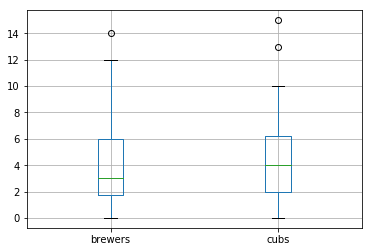

In [20]:
point_df.boxplot()

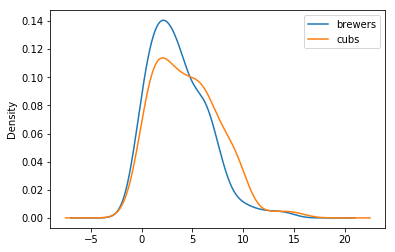

In [21]:
point_df.plot.kde()

In [22]:
mil[mil.index == 'Christian Yelich']

,games played,at bat,runs,hits,doubles,triples,home runs,runs batted in,total bases,walks,strikeouts,stolen bases,batting average,on base percentage,slugging percentage,OPS,WAR
Christian Yelich,147.0,574.0,118.0,187.0,34.0,7.0,36.0,110.0,343.0,68.0,135.0,22.0,0.326,0.402,0.598,1.0,7.6
